$$
{\huge Chapter6} \\
 Matrices, Part 2
$$

In [1]:
using LinearAlgebra
using Statistics
using Plots
using Random

**Exercise 6-1**

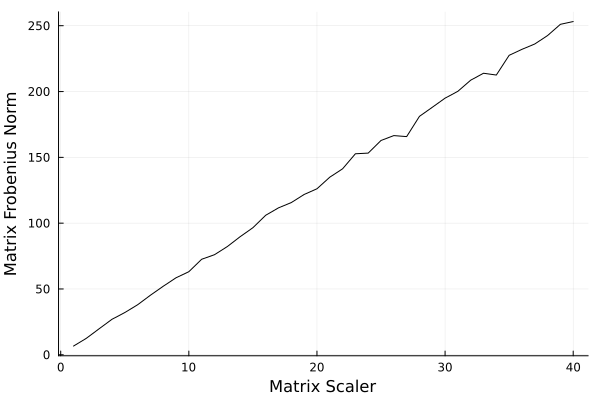

In [14]:
num_iterations = 10
num_scalers = 40

average_norms = Float64[]

for i in 1:num_scalers
    scaler = i * 50 / num_scalers
    norms = Float64[]
    
    for j in 1:num_iterations
        matrix = rand(10, 10)
        
        scaled_matrix = scaler * matrix
        
        norm = opnorm(scaled_matrix)
        
        push!(norms, norm)
    end
    average_norm = mean(norms)
    push!(average_norms, average_norm)
end

plot(1:num_scalers, average_norms, xlabel="Matrix Scaler", ylabel="Matrix Frobenius Norm", c= :black, legend=false)

**Exercise 6-2**

In [25]:
function frobenius_distance(A, B)
    return norm(A - B)
end

N = 7

A = rand(N, N)
B = rand(N, N)

s = 1.0
iterations = 0

distance = frobenius_distance(s * A, s * B)

while distance > 1
    s *= 0.9
    iterations += 1
    distance = frobenius_distance(s * A, s * B)
end

println("Number of iterations: $iterations")
println("Sclaer value: $s")

Number of iterations: 12
Sclaer value: 0.28242953648100017


**Excersize 6-3**

In [17]:
A = rand(1:10, (3, 3))
AT = transpose(A)

println("A: ", A)
println("A transposed: ", AT)
println("A norm: ", norm(A))

sqrt(tr(AT*A)) == norm(A)

A: [5 3 8; 1 2 5; 7 6 1]
A transposed: [5 1 7; 3 2 6; 8 5 1]
A norm: 14.628738838327793


true

**Excersize 6-4**

In [ ]:
# this function will do the shifting
function shifter(matrix, number)
    for (idx, i) in enumerate(eachrow(matrix))
        i[idx] += number 
    end
    return matrix
end

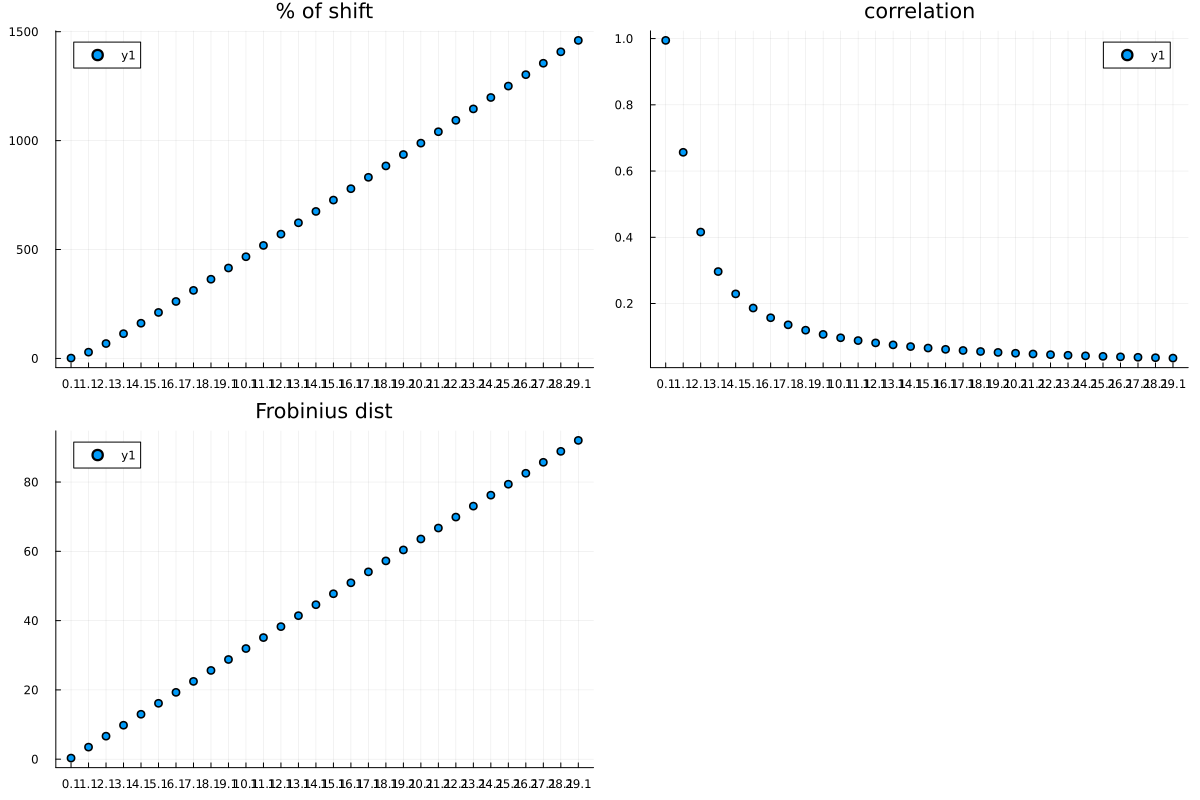

In [45]:
shift_diff = []
matrix_correlation = []
euclidean_distance = []
shift_rate = 0.1:1:30

Original_A = rand(Float64, (10, 10))
A_norm = norm(Original_A)

for shift in shift_rate
    Temp_A = copy(Original_A)
    Temp_A = shifter(Temp_A, shift)
    shifted_A_norm = norm(Temp_A)
    
    push!(shift_diff, -((A_norm - shifted_A_norm) / A_norm)*100)
    
    push!(matrix_correlation, cor(vec(Original_A), vec(Temp_A)))
    
    push!(euclidean_distance, norm(Original_A - Temp_A))
end

plot_norm_change = scatter([shift_rate], [shift_diff], title="% of shift")
plot_corr = scatter([shift_rate], [matrix_correlation], title="correlation")
plot_euclidean_dist = scatter([shift_rate], [euclidean_distance], title="Frobinius dist")

plot!(plot_norm_change, plot_corr, plot_euclidean_dist, layout = 3, xticks=shift_rate, size=(1200, 800), )    

**Excercise 6-5**

In [5]:
using LinearAlgebra
M = 4
N = 5
r = 3
A = rand(4, 3)
B = rand(3, 5)
C = A * B
println("M=4, N = 5, r=3")
print("rank of A*B is ", rank(C))

M=4, N = 5, r=3


rank of A*B is 3

**Excercise 6-6**

In [6]:
A = [1 2; 2 4] # rank-1 matrix
B = [3 6; 6 12] # rank-1 matrix
C = [1 0; 2 0] # rank-1 matrix
D = [0 1; 0 2] # rank-1 matrix
E = [1 1; 2 2] # rank-1 matrix
F = [0 0; 0 0] # rank-0 matrix

# Addition rule of matrix rank
print("r(A + B) = ", rank(A + B), "\n")  
print("r(A + C) = ", rank(A + C), "\n") 
print("r(C + D) = ", rank(C + D), "\n") 
print("r(A + D) = ", rank(A + D), "\n") 
print("r(C + E) = ", rank(C + E), "\n") 
print("r(E + F) = ", rank(E + F), "\n") 

# Multiplication rule of matrix rank
print("r(A * B) = ", rank(A * B), "\n") 
print("r(A * C) = ", rank(A * C), "\n") 
print("r(C * D) = ", rank(C * D), "\n") 
print("r(A * D) = ", rank(A * D), "\n") 
print("r(C * E) = ", rank(C * E), "\n") 
print("r(E * F) = ", rank(E * F), "\n") 

r(A + B) = 1
r(A + C) = 1
r(C + D) = 1
r(A + D) = 1
r(C + E) = 1
r(E + F) = 1


r(A * B) = 1
r(A * C) = 1
r(C * D) = 1
r(A * D) = 1
r(C * E) = 1
r(E * F) = 0


**Excersize 6-7**

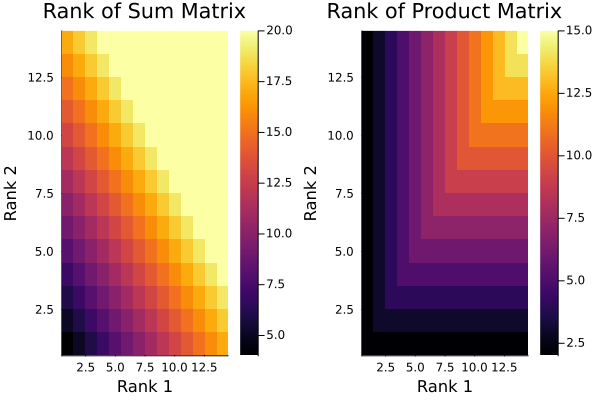

In [1]:
using LinearAlgebra
using Plots

matrix_size = 20 
rank_range = 2:15 
ranks = zeros(length(rank_range), length(rank_range), 2)
for i in rank_range
    for j in rank_range
        sum_matrix = randn(matrix_size, i) * randn(i, matrix_size) + randn(matrix_size, j) * randn(j, matrix_size)
        product_matrix = randn(matrix_size, i) * randn(i, matrix_size) * randn(matrix_size, j) * randn(j, matrix_size)
        ranks[i-1, j-1, 1] = rank(sum_matrix)
        ranks[i-1, j-1, 2] = rank(product_matrix)
    end
end

# visualizing the matrices
heatmap1 = heatmap(ranks[:, :, 1], xlabel="Rank 1", ylabel="Rank 2", title="Rank of Sum Matrix")
heatmap2 = heatmap(ranks[:, :, 2], xlabel="Rank 1", ylabel="Rank 2", title="Rank of Product Matrix")
plot(heatmap1, heatmap2, layout=(1, 2))


**Excersize 6-8**

In [7]:
A = rand(4, 4)
AT= transpose(A)
ATA = AT * A
AAT = A * AT

println(rank(A))
println(rank(AT))
println(rank(ATA))
println(rank(AAT))

4
4
4
4
